## 读取用户购买纪录

In [3]:
import pandas as pd
#将purchase_order.tab文件里面的相关字段名赋值给m_cols
m_cols = ['Time','Action','User','Product', 'Quantity','Price']
#读取purchase_order.tab文件，文件间隔符为\t，要求读取进来后Dates为第一列数据，文件列名为以上m_cols编码为utf-8,
orders = pd.read_csv('purchase_order.tab',sep = '\t',parse_dates = {'Dates':[0]},names = m_cols)
#查看orders整个数据框的相关信息
orders.head()

,Dates,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0


In [92]:
orders.head()

,Dates,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0


## 探索用户购买纪录

In [4]:
#查看orders的Product列前5行数据
orders['Product'].head()

0       P0006944501
1       P0006018073
2       P0002267974
3       P0016144236
4    P0014516980122
Name: Product, dtype: object

In [9]:
#查看Product为P0006944501的Price列数据，并获取其描述性统计信息
orders.ix[orders['Product'] =='P0006944501','Product']

0       P0006944501
9       P0006944501
775     P0006944501
2511    P0006944501
2515    P0006944501
2522    P0006944501
5457    P0006944501
5706    P0006944501
Name: Product, dtype: object

In [12]:
#查看Product为P0006944501的Price列数据，求其均值
orders[orders['Product']=='P0006944501']['Price'].describe()
orders[orders['Product']=='P0006944501']['Price'].mean()

1069.0

In [14]:
#计算orders里面有哪些Product
orders['Product'].unique()

array(['P0006944501', 'P0006018073', 'P0002267974', ..., 'P0022884606',
       'P0013911085', 'P0025123755'], dtype=object)

In [15]:
#求orders里面不同类别的Product共有多少个
len(orders['Product'].unique())

20054

In [17]:
# select Product, avg(Price) from orders 
# group by Product limit 5

#按Product统计其各自的销售价格均值
orders.groupby('Product')['Price'].mean()

Product
P0000005913         1590.000
P0000006020         1290.000
P0000006591          999.000
P0000007744         3280.000
P0000008190011      5083.000
P0000008352         1060.000
P0000010194          188.000
P0000010706          198.000
P0000011163          790.000
P0000011270         1049.000
P0000011362          899.000
P0000011421          349.000
P0000011524         3049.000
P0000013506          799.000
P0000013764          624.000
P0000017021          392.000
P0000017286         1990.000
P0000017345         4990.000
P0000017463           79.000
P0000018911         1079.000
P0000019250         6300.000
P0000021615         6282.000
P0000021733          954.000
P0000021744         1116.000
P0000022525         1790.000
P0000023122         8990.000
P0000023516         2980.000
P0000025421         2714.000
P0000025675         2980.000
P0000026622          990.000
                     ...    
P0025279490014       990.000
P0025279500013       990.000
P0025279660000      1510.000
P00252

In [18]:
# select Product, avg(Price) from orders 
# group by Product order by avg(Price) desc limit 5

#按Product统计其各自的销售价格均值并将求得的数据进行降序排序
orders.groupby('Product')['Price'].mean().sort_values(ascending=False)

Product
P0000143511       438888.0
P0000143500       438888.0
P0006584093       320000.0
P0025280275       183900.0
P0000150006       111375.0
P0018535252        98880.0
P0024251250030     98800.0
P0007107866        97900.0
P0009915463        93900.0
P0000218240035     93500.0
P0000191391        82800.0
P0014448260013     80000.0
P0014448260002     80000.0
P0022522060013     80000.0
P0012254570005     80000.0
P0012254560006     80000.0
P0012254530002     80000.0
P0014448250014     80000.0
P0014448250003     80000.0
P0022159630006     80000.0
P0012993280005     79200.0
P0000191380        76800.0
P0018726153        76500.0
P0001949340002     76200.0
P0006993663        74900.0
P0007082051        74400.0
P0009916080005     69000.0
P0009916060000     69000.0
P0007341670        68856.0
P0013021700160     68800.0
                    ...   
P0005664850004         NaN
P0012242700002         NaN
P0012242716            NaN
P0012242731            NaN
P0012242753            NaN
P0012242760003      

In [19]:
#为orders增加新列Total_Price，并利用orders里面的相关数据计算求得
orders['Total_Price'] = orders['Quantity'] * orders['Price']

In [20]:
orders.head()

,Dates,Action,User,Product,Quantity,Price,Total_Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0,249.0


In [22]:
#select User, sum(Total_Price) from orders
#gorup by User order by sum(Total_Price) desc limit 5

#按客户统计他们的消费总金额，并按降序排列
orders.groupby('User')['Total_Price'].sum().sort_values(ascending = False)

User
U166708333      2942744.0
U10120098943    1451117.0
U142809250       747550.0
U1006283751      515688.0
U10114715330     456782.0
U10062834851     439657.0
U32775842        422396.0
U330237576       335390.0
U300915168       330322.0
U32775853        319535.0
U331652356       257210.0
U327756459       250874.0
U337618442       246896.0
U14826416        233678.0
U429312466       232466.0
U323198564       232330.0
U331264932       230135.0
U466616037       226220.0
U32320035        210132.0
U32947541        204380.0
U425798741       200536.0
U152862117       191260.0
U407557037       190844.0
U330166357       184814.0
U472746348       183900.0
U323198867       168128.0
U134749370       165890.0
U323196443       156800.0
U383309737       156519.0
U331265033       154812.0
                  ...    
U10039670928         25.0
U203926776           25.0
U423898356           15.0
U456915451           15.0
U10061011163          NaN
U1006327718           NaN
U126616352            NaN
U200013

## 读取用户浏览商品纪录

In [26]:
import pandas as pd
m_cols = ['Time','Action','User','Product']
#读取purchase_view.tab文件，文件间隔符为\t，要求读取进来后Dates为第一列数据，文件列名为以上m_cols编码为utf-8,
views =pd.read_csv('purchase_view.tab',sep='\t',parse_dates={'Dates':[0]},names =m_cols,encoding='UTF-8')
#查看views整个数据框的相关信息
views.info()
#查看前5行数据
views.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191486 entries, 0 to 1191485
Data columns (total 4 columns):
Dates      1191486 non-null datetime64[ns]
Action     1191486 non-null object
User       1191486 non-null object
Product    1191486 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 36.4+ MB


,Dates,Action,User,Product
0,2015-07-01 00:00:01,view,U129297265,P0023468384
1,2015-07-01 00:00:03,view,U321001337,P0018926456
2,2015-07-01 00:00:05,view,U10070718237,P0000063593
3,2015-07-01 00:00:05,view,U393805241,P0005541535
4,2015-07-01 00:00:10,view,U10004621134,P0022135540


In [32]:
## SELECT User, Product, COUNT(Product) FROM Orders GROUP BY User, Product
#在购买数据表中按不同用户不同产品进行分组，并统计每个用户产品的购买数量，将统计结果以“buys”作为字段名添加进统计结果中
orders_cnt= orders.groupby(['User','Product'])['Action'].count().reset_index(name='buys')
orders_cnt.head()


,User,Product,buys
0,U1000001354,P0014520085,1
1,U10000044910,P0018800250,1
2,U10000056953,P0003926850034,1
3,U10000056953,P0013344760004,2
4,U10000056953,P0013834251,1


In [38]:
## SELECT User, Product, COUNT(Product) FROM views GROUP BY User, Product
#在浏览记录表数据表中按不同用户不同产品进行分组，并统计每个用户产品的浏览量，并对统计结果按浏览量降序排列，最后将统计结果以“views”作为字段名添加进统计结果中,
views_cnt =views.groupby(['User','Product'])['Action'].count().sort_values(ascending=False).reset_index(name = 'views')

In [39]:
views_cnt.head()#查看views_cnt

,User,Product,views
0,U32170633,P0022535166,3148
1,U466226468,P0004880654,2613
2,U466226468,P0004862454,2611
3,U466226468,P0006437944,2611
4,U466226468,P0006437900,2610


## 合并购买与浏览纪录

In [40]:
#将用户购买与浏览产品的数据合并在一起，生成表格merge_df,以views_cnt作为右连接表，连接结果为右连接
merge_df = pd.merge(orders_cnt,views_cnt,on=['User','Product'],how='right')
#关于数据表的连接问题，可以查看http://www.cnblogs.com/zxlovenet/p/4005256.html
#merge与concat的区别https://blog.csdn.net/ZK_J1994/article/details/77717700

In [51]:
?pd.merge

In [41]:
merge_df.head()#查看merge_df

,User,Product,buys,views
0,U10000044910,P0018800250,1.0,2
1,U10000056953,P0013834251,1.0,7
2,U10000065461,P0023597022,1.0,1
3,U10000092625,P0023729451,1.0,14
4,U10000092625,P0024236730,1.0,4


## 瞭解使用者在不同日期與時間的消費習慣

In [42]:
views.head()#查看views

,Dates,Action,User,Product
0,2015-07-01 00:00:01,view,U129297265,P0023468384
1,2015-07-01 00:00:03,view,U321001337,P0018926456
2,2015-07-01 00:00:05,view,U10070718237,P0000063593
3,2015-07-01 00:00:05,view,U393805241,P0005541535
4,2015-07-01 00:00:10,view,U10004621134,P0022135540


In [43]:
views.info()#查看views的相关信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191486 entries, 0 to 1191485
Data columns (total 4 columns):
Dates      1191486 non-null datetime64[ns]
Action     1191486 non-null object
User       1191486 non-null object
Product    1191486 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 36.4+ MB


In [44]:
# year, month, day, date, hour 
#查看views的Dates列数据的年、月、日期等信息
views['Dates'].dt.hour

0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
20          0
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29          0
           ..
1191456    23
1191457    23
1191458    23
1191459    23
1191460    23
1191461    23
1191462    23
1191463    23
1191464    23
1191465    23
1191466    23
1191467    23
1191468    23
1191469    23
1191470    23
1191471    23
1191472    23
1191473    23
1191474    23
1191475    23
1191476    23
1191477    23
1191478    23
1191479    23
1191480    23
1191481    23
1191482    23
1191483    23
1191484    23
1191485    23
Name: Dates, dtype: int64

In [46]:
# select date, count(action) from views
# group by date
#在views表中，统计每一天网站的用户浏览总次数
views_cnt_by_date  = views.groupby(views['Dates'].dt.date)['Action'].count()
views_cnt_by_date.head()#查看以上统计结果

Dates
2015-07-01    24569
2015-07-02    17043
2015-07-03    28041
2015-07-04    28625
2015-07-05    15522
Name: Action, dtype: int64

## 绘制图表

In [47]:
?views_cnt_by_date.plot

Populating the interactive namespace from numpy and matplotlib


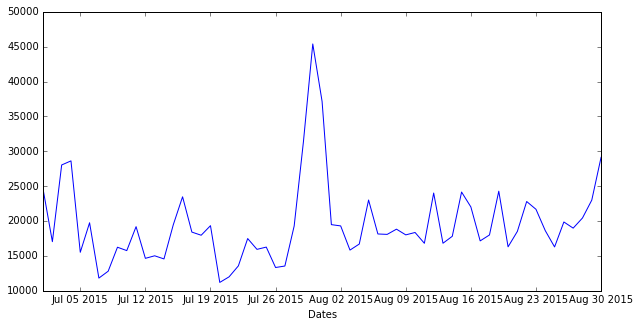

In [48]:
%pylab inline

#对每天用户浏览网站情况绘制折线图，图大小为10*5
views_cnt_by_date.plot(kind='line',figsize=[10,5])

In [49]:
# select hour(Dates), count(action) from views
# group by  hour(Dates)
#在views表中，统计一天24内每个小时网站的用户浏览总次数
views_cnt_by_hour  = views.groupby(views['Dates'].dt.hour)['Action'].count()

In [50]:
views_cnt_by_hour.head()

Dates
0    69806
1    42582
2    24408
3    15930
4    10563
Name: Action, dtype: int64

Populating the interactive namespace from numpy and matplotlib


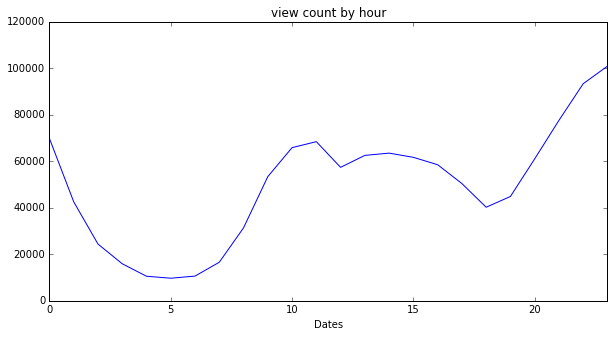

In [52]:
%pylab inline

#各个小时用户浏览网站情况绘制折线图，图大小为10*5，标题为view count by hour
views_cnt_by_hour.plot(kind='line',figsize=[10,5],title='view count by hour')

In [53]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54772 entries, 0 to 54771
Data columns (total 7 columns):
Dates          54772 non-null datetime64[ns]
Action         54772 non-null object
User           54772 non-null object
Product        54772 non-null object
Quantity       54772 non-null int64
Price          54721 non-null float64
Total_Price    54721 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 2.9+ MB


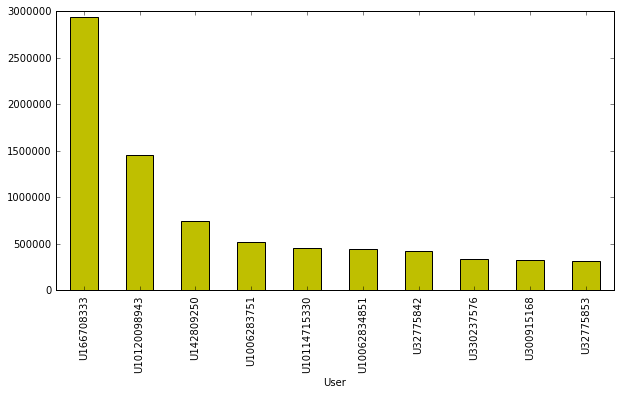

In [57]:
orders['Total_price'] = orders['Quantity'] * orders['Price']#增加新列Total_price,并利用orders相关数据计算
#按客户统计他们的消费总金额，并按降序排列,最终取前10个用户的统计数据
g = orders.groupby('User')['Total_price'].sum().sort_values(ascending=False)[0:10]
#绘制前10个用户的消费金额柱形图，图片大小10*5
g.plot(kind='bar',figsize=[10,5],color='y')

In [58]:
#在views表中统计网站每天的浏览总数
view_daily_cnt = views.groupby(views['Dates'].dt.date)['Action'].count()
view_daily_cnt.head()

Dates
2015-07-01    24569
2015-07-02    17043
2015-07-03    28041
2015-07-04    28625
2015-07-05    15522
Name: Action, dtype: int64

In [59]:
#在orders表中统计网站每天用户的购买总次数
orders_daily_cnt = orders.groupby(orders['Dates'].dt.date)['Action'].count()
orders_daily_cnt.head()

Dates
2015-07-01    2324
2015-07-02    2059
2015-07-03    1778
2015-07-04    2166
2015-07-05    1413
Name: Action, dtype: int64

In [80]:
?pd.concat

In [62]:
#将view_daily_cnt与orders_daily_cnt表按列方向拼接,不需要按主键合并
df =pd.concat([view_daily_cnt,orders_daily_cnt],axis=1)
##关于merge与concat的区别：https://blog.csdn.net/ZK_J1994/article/details/77717700
df=df.dropna()#删除具有空值的行,并将删除结果覆盖原数据框
df.head()
df.columns=['Views','Orders']#将df的字段名命名为'Views', 'Orders'
df.head()


,Views,Orders
2015-07-01,24569,2324.0
2015-07-02,17043,2059.0
2015-07-03,28041,1778.0
2015-07-04,28625,2166.0
2015-07-05,15522,1413.0


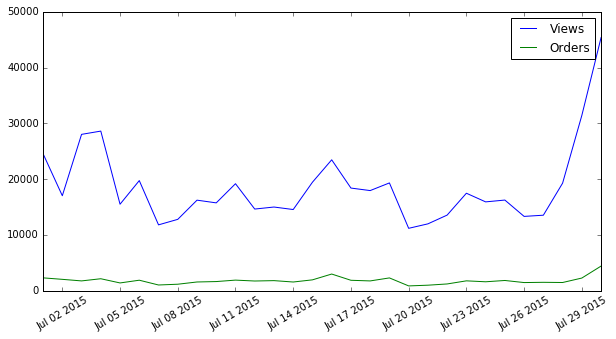

In [65]:
#对df数据绘制折线图，图的大小为10*5，设置X轴刻度的显示旋转度为30
df.plot(kind='line',figsize=[10,5],rot=30)
#plot里面各参数的使用说明：https://www.cnblogs.com/xitingxie/p/8359392.html